# Analysing Forest Fire in Brazil

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### Understanding the data

In [2]:
data = pd.read_csv('data.csv', thousands = '.')    # Importing data from csv file
data

,year,state,month,number,date
0,1998,Acre,Janeiro,0,1998-01-01
1,1999,Acre,Janeiro,0,1999-01-01
2,2000,Acre,Janeiro,0,2000-01-01
3,2001,Acre,Janeiro,0,2001-01-01
4,2002,Acre,Janeiro,0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128,2012-01-01
6450,2013,Tocantins,Dezembro,85,2013-01-01
6451,2014,Tocantins,Dezembro,223,2014-01-01
6452,2015,Tocantins,Dezembro,373,2015-01-01


In [3]:
# data.shape      # Gives total rows and column

# data.head()     # Prints starting rows

# data.describe(include='all')     # Describes database

data.isna().sum()       # Gives sum of rows with missing values in columns


year      0
state     0
month     0
number    0
date      0
dtype: int64

### Data Cleansing 

In [4]:
# We do not need instantces when there is no fire recorded
# Therefore we will drop this rows with number = 0


data = data.replace(0, np.nan)                  # Replace 0 with numpy NotANumber

data2 = data.dropna(subset=['number'])          # Drops rows with column values as nan

data2.describe(include='all')

,year,state,month,number,date
count,5837.000000,5837,5837,5837.000000,5837
unique,NaN,23,12,NaN,20
top,NaN,Rio,Outubro,NaN,2016-01-01
freq,NaN,661,534,NaN,317
mean,2007.834847,NaN,NaN,577.947918,NaN
std,5.649076,NaN,NaN,1625.176973,NaN
min,1998.000000,NaN,NaN,1.000000,NaN
25%,2003.000000,NaN,NaN,16.000000,NaN
50%,2008.000000,NaN,NaN,72.000000,NaN
75%,2013.000000,NaN,NaN,334.000000,NaN


### Visualizing Dataframe 1

In [5]:
# We will create a new dataframe from the existing one containing two columns 'month' and 'number' for x and y axis respectively 


ff_per_month = data2.groupby('month')['number'].sum()                       # Creates a new Series 

# Since the series is made alphabetically, reindex it be in order of months
# data.month.unique()
ff_per_month = ff_per_month.reindex(list(data.month.unique()), axis=0)      

ff_per_month = ff_per_month.to_frame()                                      # Convert series to dataframe 

# In current state 'month' is consider as index. To fix this:
ff_per_month.reset_index(level=0, inplace=True)                              

ff_per_month


,month,number
0,Janeiro,52587.0
1,Fevereiro,30952.0
2,Março,35118.0
3,Abril,28364.0
4,Maio,46083.0
5,Junho,111405.0
6,Julho,217620.0
7,Agosto,740841.0
8,Setembro,1015925.0
9,Outubro,629665.0


In [6]:
# To change month from portuguese to english
ff_per_month.replace(['Janeiro','Fevereiro','Março','Abril','Maio','Junho','Julho','Agosto','Setembro','Outubro','Novembro','Dezembro'],
                      ['January','February','March','April','May','June','July','August','September','October','November','December'],
                      inplace=True)

ff_per_month

,month,number
0,January,52587.0
1,February,30952.0
2,March,35118.0
3,April,28364.0
4,May,46083.0
5,June,111405.0
6,July,217620.0
7,August,740841.0
8,September,1015925.0
9,October,629665.0


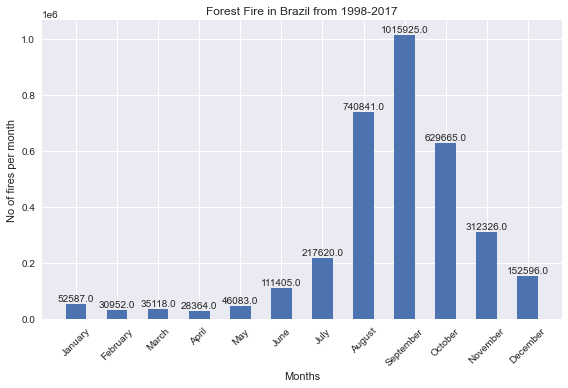

In [7]:
# Plotting our bar

plt.style.use('seaborn')

# To print value above the bar
for i, num in enumerate(ff_per_month['number']):
    plt.text(i, num + 10000,  # Position of value
        num,    # Value
        ha='center', fontsize=10) 


plt.bar(ff_per_month['month'], ff_per_month['number'],width=0.5)
plt.xticks(rotation=45)     # To rotate x value

plt.xlabel('Months')
plt.ylabel('No of fires per month')
plt.title('Forest Fire in Brazil from 1998-2017')

plt.tight_layout()
plt.show()

### Visualizing Dataframe 2

In [8]:
# Our goal is to get top 10 states respect to total forest fire

ff_per_state = data2.groupby('state')['number'].sum()
ff_per_state.sort_values(inplace=True, ascending = True)
ff_per_state = ff_per_state[:10]
ff_per_state = ff_per_state.to_frame()
ff_per_state.reset_index(inplace=True, level = 0)
ff_per_state

,state,number
0,Sergipe,3237.0
1,Distrito Federal,3561.0
2,Alagoas,4644.0
3,Espirito Santo,6546.0
4,Pernambuco,24498.0
5,Amapa,25116.0
6,Santa Catarina,27209.0
7,Roraima,29454.0
8,Rio,50021.0
9,Sao Paulo,62308.0


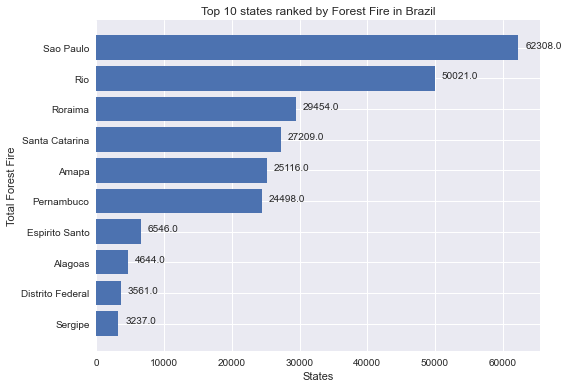

In [9]:
plt.barh(ff_per_state['state'], ff_per_state['number'])

for i, j in enumerate(ff_per_state['number']):
    plt.text(j + 1000, i,    # Position of text 
             j)              # Value
    
plt.title('Top 10 states ranked by Forest Fire in Brazil')
plt.xlabel('States')
plt.ylabel('Total Forest Fire')

plt.tight_layout()
plt.show()